# Практическое задание

## Задача 1.

К алгоритму kNN, представленному на уроке,
реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

from problem_1_knn import KNN
from problem_1_plot import scatter_1, scatter_2, plot_1
from example_1_relation import accuracy

### Set parameters

In [2]:
dataset_feature_indexes = (0, 1)
dataset_parameters = {'return_X_y': True}

split_parameters = {
    'test_size': .2,
    'random_state': 1
}

neighbor_numbers = list(range(1, 5, 1)) + \
    list(range(5, 30, 5)) + \
    list(range(30, 90, 10))

knn_fit_parameters = [
    {'weighted': 0},
    {'weighted': 1},
    {'weighted': 1, 'weight': lambda i: 1 / i},
    {'weighted': 1, 'weight': lambda i: .9 ** i},
    {'weighted': 2},
    {'weighted': 2, 'weight': lambda d: .9 ** d}
]

knn_fit_labels = [
    r'$w = 1$',
    r'$w(i) = \frac{k + 1 - i}{k}$',
    r'$w(i) = \frac{1}{i}$',
    r'$w(i) = 0.9^{i}$',
    r'$w(d) = \frac{d(z_{k}, x) - d(z_{i}, x)}{d(z_{k}, x) - d(z_{1}, x)}$',
    r'$w(d) = 0.9^{d}$'
]

colormap_parameters = {
    'normal': {'colors': ['red', 'green', 'blue']},
    'light': {'colors': ['#FFAAAA', '#AAFFAA', '#00AAFF']}
}

#### Configure parameters

In [3]:
colormaps = {
    key: ListedColormap(**parameters)
    for key, parameters in colormap_parameters.items()
}

### Load dataset

In [4]:
X, y = load_iris(**dataset_parameters)

X = X[:, dataset_feature_indexes]
X = MinMaxScaler().fit_transform(X)

#### Plot dataset

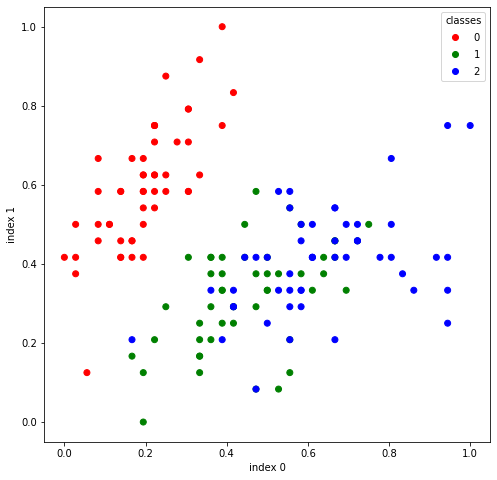

In [5]:
indexes = 0, 1

subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': f'index {indexes[0]}',
    'ylabel': f'index {indexes[1]}'
}
scatter_parameters = {'cmap': colormaps['normal']}
legend_parameters = {'title': 'classes'}

_, axis = plt.subplots(**subplots_parameters)

scatter_1(
    X[:, indexes], y,
    axis,
    axis_parameters,
    scatter_parameters,
    legend_parameters
)

plt.show()

### Split dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    **split_parameters
)

#### Plot split

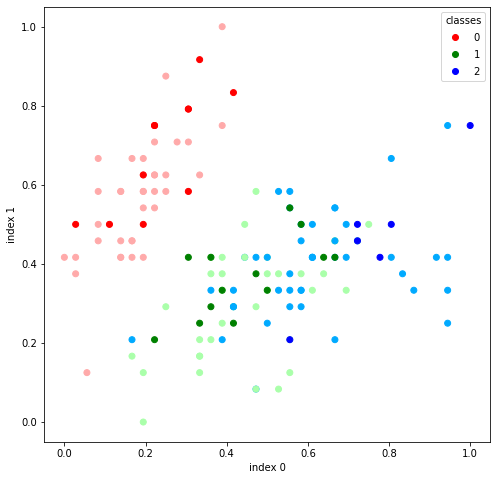

In [7]:
indexes = 0, 1

subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': f'index {indexes[0]}',
    'ylabel': f'index {indexes[1]}'
}
scatter_parameters = [
    {'cmap': colormaps['light']},
    {'cmap': colormaps['normal']}
]
legend_parameters = {'title': 'classes'}

_, axis = plt.subplots(**subplots_parameters)

scatter_2(
    (X_train, X_test),
    (y_train, y_test),
    axis,
    axis_parameters,
    scatter_parameters,
    legend_parameters
)

plt.show()

### Calculate metrics weighted by index

In [8]:
knn_fit_indexes = 1, 2, 3, 0

_knn_fit_parameters, _knn_fit_labels = zip(
    *[
        (knn_fit_parameters[i], knn_fit_labels[i])
        for i in knn_fit_indexes
    ]
)

model = KNN()
a_test = []
for _ in _knn_fit_parameters:
    model.fit(X0=X_train, y0=y_train, **_)
    a_test.append(
        [model.predict(X_test, k) for k in neighbor_numbers]
    )

test_metrics = [
    [accuracy(a_test[i][j], y_test) for j in range(len(a_test[i]))]
    for i in range(len(a_test))
]

#### Plot metrics

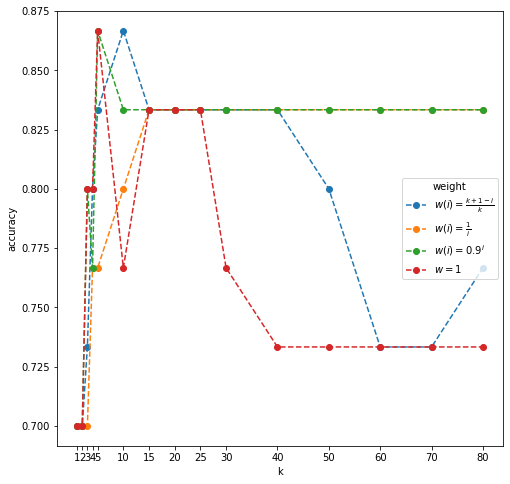

In [9]:
subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': 'k',
    'ylabel': 'accuracy',
    'xticks': neighbor_numbers
}
plot_fmt = 'o--'
plot_parameters = [
    {'label': label} for label in _knn_fit_labels
]
legend_parameters = {'title': 'weight'}

_, axis = plt.subplots(**subplots_parameters)

plot_1(
    neighbor_numbers,
    test_metrics,
    axis,
    axis_parameters,
    plot_fmt,
    plot_parameters,
    legend_parameters
)

plt.show()

### Calculate metrics weighted by distance

In [10]:
knn_fit_indexes = 4, 5, 0

_knn_fit_parameters, _knn_fit_labels = zip(
    *[
        (knn_fit_parameters[i], knn_fit_labels[i])
        for i in knn_fit_indexes
    ]
)

model = KNN()
a_test = []
for _ in _knn_fit_parameters:
    model.fit(X0=X_train, y0=y_train, **_)
    a_test.append(
        [model.predict(X_test, k) for k in neighbor_numbers]
    )

test_metrics = [
    [accuracy(a_test[i][j], y_test) for j in range(len(a_test[i]))]
    for i in range(len(a_test))
]

#### Plot metrics

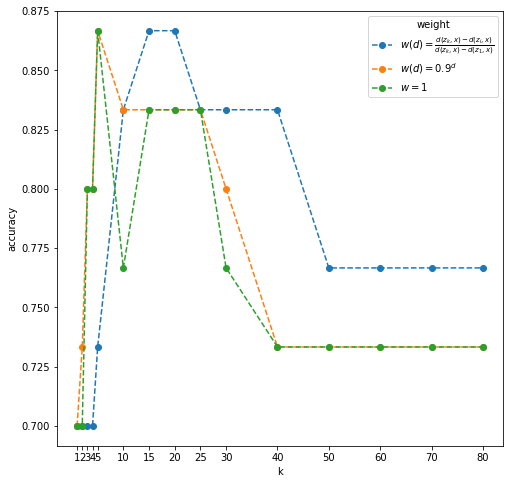

In [11]:
subplots_parameters = {'figsize': (8, 8)}
axis_parameters = {
    'xlabel': 'k',
    'ylabel': 'accuracy',
    'xticks': neighbor_numbers
}
plot_fmt = 'o--'
plot_parameters = [
    {'label': label} for label in _knn_fit_labels
]
legend_parameters = {'title': 'weight'}

_, axis = plt.subplots(**subplots_parameters)

plot_1(
    neighbor_numbers,
    test_metrics,
    axis,
    axis_parameters,
    plot_fmt,
    plot_parameters,
    legend_parameters
)

plt.show()